In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

import pandas as pd

import scipy as sp
#%matplotlib widget

In [2]:
tabla_angulos = pd.read_excel('AngulosReflexionRefraccion.xlsx', sheet_name=None)
tabla_angulos

{'Cara Plana':     Ángulo incidencia  Ángulo Reflexión  Ángulo Refracción
 0                   5               5.0                3.0
 1                  10               9.5                6.5
 2                  15              15.0               10.0
 3                  20              19.0               13.0
 4                  25              24.5               17.5
 5                  30              30.0               20.0
 6                  35              35.0               22.5
 7                  40              40.0               26.0
 8                  45              44.0               28.0
 9                  50              50.0               31.0
 10                 55              54.5               33.0
 11                 60              60.0               36.0
 12                 65              65.0               37.5
 13                 70              69.0               39.0
 14                 75              74.5               41.0
 15                 80    

In [3]:
angulos = tabla_angulos['Cara Plana'].keys()
angulos_plana = {angulo: tabla_angulos['Cara Plana'][angulo].to_numpy() for angulo in angulos}
angulos_curva = {angulo: tabla_angulos['Cara Curva'][angulo].to_numpy() for angulo in angulos}

In [67]:
incidente_plana, reflexion_plana, refracción_plana = [
	angulos for angulos in angulos_plana.values()
]
incidente_curva, reflexion_curva, refracción_curva = [
	angulos for angulos in angulos_curva.values()
]

regresion_plana_param = {
	'Reflexion': sp.stats.linregress(
		incidente_plana, reflexion_plana
	),
	'Refraccion': sp.stats.linregress(
		np.sin(np.radians(incidente_plana)), np.sin(np.radians(refracción_plana))
	)
}
regresion_plana_plot = {
	'Reflexion': lambda angulo: regresion_plana_param['Reflexion'].intercept
	+ regresion_plana_param['Reflexion'].slope * angulo,
	'Refraccion': lambda angulo: regresion_plana_param['Refraccion'].intercept
	+ regresion_plana_param['Refraccion'].slope * angulo
}

regresion_curva_param = {
	'Reflexion': sp.stats.linregress(
		incidente_curva, reflexion_curva
	),
	'Refraccion': sp.stats.linregress(
		np.sin(
			np.radians(incidente_curva[~np.isnan(refracción_curva)])
		),
		np.sin(
			np.radians(refracción_curva[~np.isnan(refracción_curva)])
		)
	)
}
regresion_curva_plot = {
	'Reflexion': lambda angulo: regresion_curva_param['Reflexion'].intercept
	+ regresion_curva_param['Reflexion'].slope * angulo,
	'Refraccion': lambda angulo: regresion_curva_param['Refraccion'].intercept
	+ regresion_curva_param['Refraccion'].slope * angulo
}

In [79]:
1/regresion_plana_param['Refraccion'].slope

1.4808483420422278

In [44]:
pd.DataFrame.from_dict(regresion_plana_param, orient='index')

,slope,intercept,rvalue,pvalue,stderr
Reflexion,0.997206,-0.225000,0.999864,2.260904e-26,0.004390
Refraccion,0.675289,-0.001334,0.999523,1.495223e-22,0.005574


In [6]:
regresiones_plana_table = pd.DataFrame.from_dict(regresion_plana_param)#, orient='index')
regresiones_plana_table.to_latex(
	index=False,
	float_format='%.2e',
	position='H',
	caption='Parametros del ajuste lineal para la cara plana.',
	label='tabla_param_plana'
)

'\\begin{table}[H]\n\\caption{Parametros del ajuste lineal para la cara plana.}\n\\label{tabla_param_plana}\n\\begin{tabular}{rr}\n\\toprule\nReflexion & Refraccion \\\\\n\\midrule\n9.97e-01 & 6.75e-01 \\\\\n-2.25e-01 & -1.33e-03 \\\\\n1.00e+00 & 1.00e+00 \\\\\n2.26e-26 & 1.50e-22 \\\\\n4.39e-03 & 5.57e-03 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [68]:
regresiones_curva_table = pd.DataFrame.from_dict(regresion_curva_param, orient='index')
regresiones_curva_table#.to_latex(
#	index=False,
#	float_format='%.3f',
#	position='H',
#	caption='Parametros del ajuste lineal para la cara curva.',
#	label='tabla_param_curva'
#)

,slope,intercept,rvalue,pvalue,stderr
Reflexion,1.015735,-1.012500,0.999928,2.569397e-28,0.003247
Refraccion,1.487024,-0.005051,0.999880,4.308150e-12,0.009401


In [ ]:
for regresion in regresion_curva_param.values():
	print(regresion.intercept_stderr)

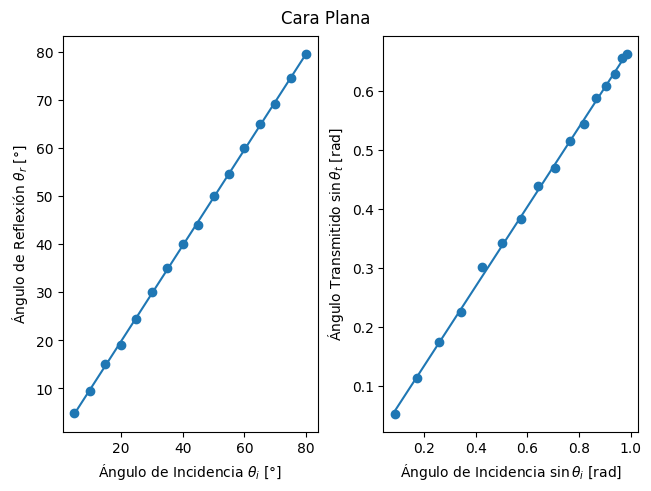

In [76]:
fig1, ax1 = plt.subplots(1,2, layout='constrained')
fig1.suptitle('Cara Plana')

ax1[0].set(
	xlabel='Ángulo de Incidencia $\\theta_i$ [°]', ylabel='Ángulo de Reflexión $\\theta_r$ [°]',
)


ax1[0].scatter(incidente_plana, reflexion_plana)
ax1[0].plot(incidente_plana, regresion_plana_plot['Reflexion'](incidente_plana))


ax1[1].set(
	xlabel='Ángulo de Incidencia $\\sin\\theta_i$ [rad]', ylabel='Ángulo Transmitido $\\sin\\theta_t$ [rad]',
)
ax1[1].scatter(np.sin(np.radians(incidente_plana)), np.sin(np.radians(refracción_plana)))
ax1[1].plot(
	np.sin(
		np.radians(incidente_plana)
	),
	regresion_plana_plot['Refraccion'](
		np.sin(np.radians(incidente_plana)
			  )
	)
)

#ax1.legend(
#	plots.values(), plots.keys(), handler_map={tuple: HandlerTuple(ndivide=None)},
#	shadow=True, fancybox=True
#)
plt.savefig('Angulos_Plana.pdf', dpi=300)

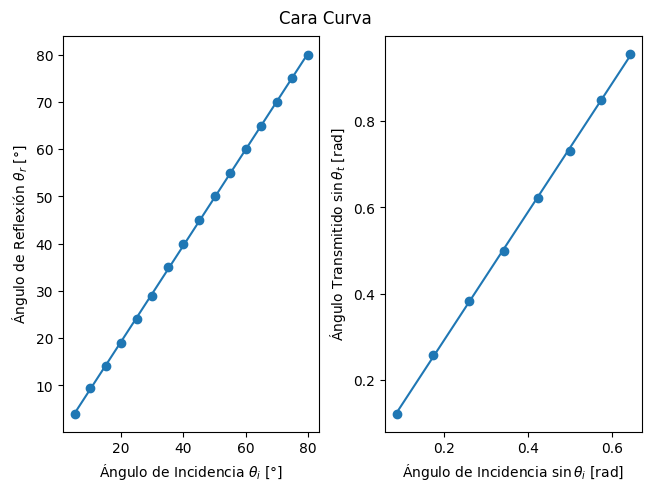

In [77]:
fig2, ax2 = plt.subplots(1,2, layout='constrained')
fig2.suptitle('Cara Curva')

sin_incidente_limitados_rad = np.sin(np.radians(incidente_curva[~np.isnan(refracción_curva)]))

ax2[0].set(
	xlabel='Ángulo de Incidencia $\\theta_i$ [°]', ylabel='Ángulo de Reflexión $\\theta_r$ [°]',
)

ax2[0].scatter(incidente_curva, reflexion_curva)
ax2[0].plot(incidente_curva, regresion_curva_plot['Reflexion'](incidente_curva))


ax2[1].set(
	xlabel='Ángulo de Incidencia $\\sin\\theta_i$ [rad]', ylabel='Ángulo Transmitido $\\sin\\theta_t$ [rad]',
)
ax2[1].scatter(np.sin(np.radians(incidente_curva)), np.sin(np.radians(refracción_curva)))
ax2[1].plot(
	sin_incidente_limitados_rad,
	regresion_curva_plot['Refraccion'](sin_incidente_limitados_rad)
)

#ax1.legend(
#	plots.values(), plots.keys(), handler_map={tuple: HandlerTuple(ndivide=None)},
#	shadow=True, fancybox=True
#)
plt.savefig('Angulos_Curva.pdf', dpi=300)